In [12]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.frame import DataFrame
fr= open("F:\\workdata\\new_full_data\\杭州_城区_lbs_price_1.txt",encoding='UTF-8')
df = pd.read_csv(fr,sep=',',dtype={"sex": str, "birthyear": str,"marriage":str})


            familyincm     price
familyincm    1.000000  0.168948
price         0.168948  1.000000


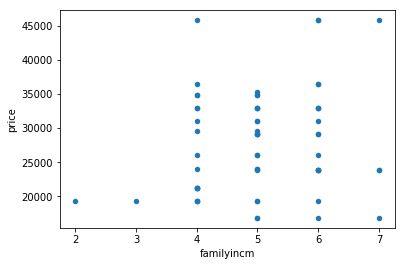

In [13]:
# 最基本的，所有的城市居民中，有家庭收入记录的，所有数据
df_1 = df[(df['familyincm']>0)]
# 选取其中的多个列 这里选择家庭收入和房价列
a = pd.DataFrame(df_1,columns = ['familyincm','price'])
print(a.corr())#0.029181
# 散点图
a.plot.scatter(x='familyincm', y='price')

            familyincm     price
familyincm    1.000000 -0.111623
price        -0.111623  1.000000


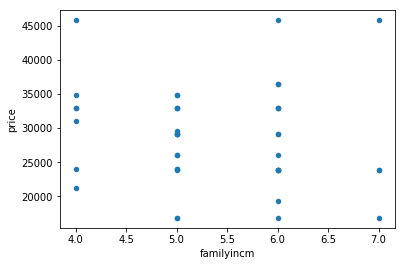

In [14]:
# 去掉租赁的
df_2 = df[(df['familyincm']>0)&(df['houseowner']=='自家（包括父母家）自有住房')]
# 选取其中的多个列 这里选择家庭收入和房价列
a = pd.DataFrame(df_2,columns = ['familyincm','price'])
print(a.corr())#-0.330829
# 散点图
a.plot.scatter(x='familyincm', y='price')

            familyincm     price
familyincm    1.000000  0.064226
price         0.064226  1.000000


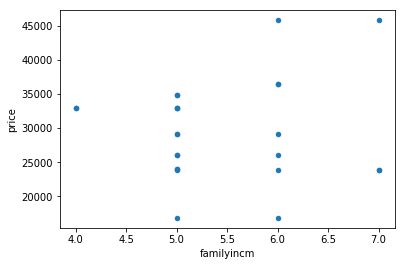

In [15]:
# 进一步 只考虑男性
df_3 = df[(df['familyincm']>0)&(df['houseowner']=='自家（包括父母家）自有住房')&(df['sex']=='1')]
# 选取其中的多个列 这里选择家庭收入和房价列
a = pd.DataFrame(df_3,columns = ['familyincm','price'])
print(a.corr())#-0.227072
# 散点图
a.plot.scatter(x='familyincm', y='price')

            familyincm     price
familyincm    1.000000  0.084996
price         0.084996  1.000000


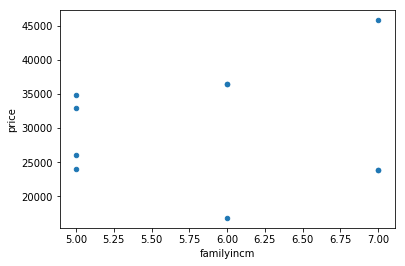

In [16]:
# 进一步 只考虑教育程度为本科的
df_3 = df[(df['familyincm']>0)&(df['houseowner']=='自家（包括父母家）自有住房')&(df['sex']=='1')&(df['education']=='本科')]
# 选取其中的多个列 这里选择家庭收入和房价列
a = pd.DataFrame(df_3,columns = ['familyincm','price'])
print(a.corr())#0.080699
# 散点图
a.plot.scatter(x='familyincm', y='price')

            familyincm     price
familyincm    1.000000  0.137565
price         0.137565  1.000000


,familyincm,price
3,5,24000
6,7,23809
8,6,16831
13,6,36478
42,7,23809
51,5,26000
52,6,36478
57,5,34770
58,7,45794


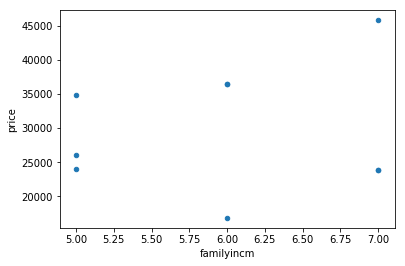

In [17]:
# 进一步  只考虑非农业户口
df_3 = df[(df['familyincm']>0)&(df['houseowner']=='自家（包括父母家）自有住房')&(df['sex']=='1')&(df['education']=='本科')&(df['huji']==1)]
# 选取其中的多个列 这里选择家庭收入和房价列
a = pd.DataFrame(df_3,columns = ['familyincm','price'])
print(a.corr())#0.137565
# 散点图
a.plot.scatter(x='familyincm', y='price')
a

In [19]:
# 一个是 收入6 但是 住在很穷的地方8000的一个人
# 我要把这个人的id输出出来
# 还有一个收入7 住在20000到25000的一个人
# 这个人的id也要输出出来
# 在df_3中按照行选择即可，条件就是 某列的数据<20000

df_3[df_3['price']<20000]
id_1 = df_3[df_3['price']<20000]['new']

8    097b9acf2482f5d5350495af92062ef9
Name: new, dtype: object

In [36]:
# 读取id对应的时空文件信息
import pandas as pd
fr2= open("F:\\workdata\\new_full_data\\杭州_城区_lbs_price.txt",encoding='UTF-8')
df_st = pd.read_csv(fr2,sep=',',dtype={"sex": str, "birthyear": str,"marriage":str,'new':str})
df_st_id_1 = df_st[df_st['new']=='097b9acf2482f5d5350495af92062ef9']

df_st_id_1['price']



861    16831
862    16831
863    16831
864    16831
865    16831
866    16831
867    16831
868    16831
869    16831
870    16831
871    16831
872    16831
873    16831
874    16831
875    16831
876    16831
877    16831
878    16831
879    16831
880    16831
881    16831
882    16831
883    16831
884    16831
885    16831
886    16831
887    16831
888    16831
889    16831
890    16831
891    16831
892    16831
893    16831
894    16831
895    16831
896    16831
897    16831
898    16831
899    16831
900    16831
901    16831
902    16831
903    16831
904    16831
905    16831
906    16831
907    16831
908    16831
909    16831
910    16831
911    16831
912    16831
913    16831
914    16831
Name: price, dtype: int64

In [24]:
from collections import defaultdict

import json
import math
x_pi = 3.14159265358979324 * 3000.0 / 180.0
def gcj02tobd09(lng, lat):
    """
    火星坐标系(GCJ-02)转百度坐标系(BD-09)
    谷歌、高德——>百度
    :param lng:火星坐标经度
    :param lat:火星坐标纬度
    :return:
    """
    z = math.sqrt(lng * lng + lat * lat) + 0.00002 * math.sin(lat * x_pi)
    theta = math.atan2(lat, lng) + 0.000003 * math.cos(lng * x_pi)
    bd_lng = z * math.cos(theta) + 0.0065
    bd_lat = z * math.sin(theta) + 0.006
    return [bd_lng, bd_lat]

In [25]:
html1='''<!DOCTYPE html>
<html>
<head>
	<meta charset="UTF-8">
	<title></title>

    <style type="text/css">
        html, body {jike
            width: 100%;
            hessh netai@134.76.81.154 -L 127.0.0.1:1234:127.0.0.1:8999ight: 100%;
            margin: 0;
            padding: 0;
            overflow: hidden;
        }

        #map {
            width: 100%;
            height: 100%;
        }
    </style>
</head>    
<body>

    <div id="map"></div>
    <canvas id="canvas"></canvas>

    <script type="text/javascript" src="http://api.map.baidu.com/api?v=2.0&ak=pGfGZaYGLoWCaQGWg7kwQac96BGttgOY"></script>
    <script type="text/javascript" src="build/mapv.js"></script>

    <script type="text/javascript">

        // 百度地图API功能
        var map = new BMap.Map("map", {
            enableMapClick: false
        });    // 创建Map实例
        map.centerAndZoom(new BMap.Point(120.19, 30.26), 12);  // 初始化地图,设置中心点坐标和地图级别
        map.enableScrollWheelZoom(true); // 开启鼠标滚轮缩放

        //map.setMapStyle({
        //    style: 'day'
        //});
        map.addControl(new BMap.MapTypeControl()); 
var data = [ // 点数据
'''

html2=''']
        

        var dataSet = new mapv.DataSet(data);

        var options = {
            size: 13,
            gradient: { 0.25: "rgb(0,0,255)", 0.55: "rgb(0,255,0)", 0.85: "yellow", 1.0: "rgb(255,0,0)"},
            max: 30,
            draw: 'heatmap'
        }

        var mapvLayer = new mapv.baiduMapLayer(map, dataSet, options);
    </script>
	
</body>
</html>

'''

In [31]:
def heatmap(lat_list,lng_list,filename):
    # 输入float形式的lat list 和lng list
        f2 = open('F:\\workdata\\new_full_data\\heatmap_' +filename +'.html', 'w')
        f2.write(html1)

#         lng_list= []
#         lat_list= []
        visit_place_dict = defaultdict(list)#热力图需要先计算每个点的数量，再次基础上稍作修改 可以统计每天每小时的等等

        for i,lat in enumerate(lat_list):#转换经纬度 并记录每个gps地点的签到数量
            lng=lng_list[i]
            temp_list = gcj02tobd09(lng,lat)#原始精度 qq转换成百度经纬度
            key = str(temp_list[0]) + '-' + str(temp_list[1])
            visit_place_dict.setdefault(key, [0, 0, 0])  # 值1是总数 值2是白天 值3是晚上
            visit_place_dict[key][0] += 1
#             hour = data['h'][i]
        
        for key, val in visit_place_dict.items():#画热度图
            lng = float((key.split('-'))[0])
            lat = float((key.split('-'))[1])
            count = val[0]
            f2.write('{geometry:{type:\'Point\',coordinates:[' + str(lng) + ',' + str(lat) + ']},count:' + str( count) + '},\n')
        
        f2.write(html2)
        f2.close()

In [27]:
# 经纬度处理 转list
lng_list = df_st_id_1['longtitude'].map(lambda x:x/1000000).tolist()
lat_list = df_st_id_1['latitude'].map(lambda x:x/1000000).tolist()

In [28]:
lng_list

[120.213472,
 120.213451,
 120.213455,
 120.206197,
 120.210669,
 120.213418,
 120.213508,
 120.212731,
 120.213496,
 120.213372,
 120.213445,
 120.213463,
 120.213394,
 120.210694,
 120.210685,
 120.210658,
 120.210657,
 120.2107,
 120.210848,
 120.210675,
 120.210679,
 120.210759,
 120.210682,
 120.210663,
 120.210683,
 120.210664,
 120.210668,
 120.210654,
 120.210648,
 120.210657,
 120.21066,
 120.210653,
 120.210662,
 120.210666,
 120.210661,
 120.210661,
 120.210671,
 120.210661,
 120.210663,
 120.210641,
 120.210617,
 120.210631,
 120.210648,
 120.210676,
 120.210654,
 120.210675,
 120.210685,
 120.210684,
 120.210693,
 120.210683,
 120.210661,
 120.210722,
 120.210665,
 120.21077]

In [1]:
heatmap(lat_list,lng_list,'097b9acf2482f5d5350495af92062ef9')

NameError: name 'heatmap' is not defined

# 4-13 重新获取一下社区 ，在链家上重新获取对应房价

In [3]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.frame import DataFrame
fr= open("F:\\workdata\\new_full_data\\杭州_城区_lbs_price_1.txt",encoding='UTF-8')
df = pd.read_csv(fr,sep=',',dtype={"sex": str, "birthyear": str,"marriage":str})
pd.set_option('max_columns',1000) 
pd.set_option('max_row',300) 
df.head()

,year,sex,birthyear,marriage,urbcode,ses2,earnlvl,familyincm,expenditure,provname,prefname,cntyname,townname,villname,huji,houseowner,bathroom,education,eduyr,worktype,industry,timestamp,longtitude,latitude,new,price
0,2015,2,1995,1,111,5,2,3,3,浙江省,杭州市,余杭区,乔司镇,乔司社区,6.0,租赁住房,有独立厨房和卫生间,高中/中专/大学,12,个体工商户,生活服务业,1.534428e+09,104904585.0,26560002.0,bea1b846de507d4b259291ea6a8d2dc1,19308
1,2017,1,1979,3,111,3,3,6,5,浙江省,杭州市,下城区,石桥街道,石桥社区,1.0,自家（包括父母家）自有住房,有独立厨房和卫生间,高中/中专/大学,12,个体工商户,其他,1.534548e+09,120181899.0,30334708.0,268f6dc4966adc08ab01f1331581c2f4,29087
2,2016,1,1981,3,111,3,5,6,\N,浙江省,杭州市,滨江区,长河街道,江二社区,3.0,租赁住房,有独立厨房和卫生间,本科,16,合资外资港澳台员工,科技教育和文化产业,1.534317e+09,107749072.0,26385771.0,3fddb90bc4d5cf8a47001a0d5fd0d408,31036
3,2016,1,1982,3,111,4,3,5,\N,浙江省,杭州市,下城区,潮鸣街道,知足弄社区,1.0,自家（包括父母家）自有住房,有独立厨房和卫生间,本科,16,科教文卫事业单位,科技教育和文化产业,1.534569e+09,110181400.0,38759351.0,15be5fcc0e2225772c77faff659ea709,24000
4,2015,1,1964,3,111,1,3,5,4,浙江省,杭州市,余杭区,乔司镇,乔司社区,6.0,租赁住房,有独立厨房和卫生间,高中/中专/大学,12,个体工商户,生活服务业,1.534547e+09,116224347.0,32741881.0,981878c0749bfdebd955cb7341f6faae,19308


In [6]:
print (df['villname'].unique())

['乔司社区' '石桥社区' '江二社区' '知足弄社区' '江一社区' '西陵社区' '刀茅巷社区' '东河社区' '共联社区' '协同社区'
 '江三社区' '杨家社区' '长一社区' '华中社区']


## 小区还是太多 先看昨天最后一个图

In [8]:
# 进一步 只考虑教育程度为本科的
df_3 = df[(df['familyincm']>0)&(df['houseowner']=='自家（包括父母家）自有住房')&(df['sex']=='1')&(df['education']=='本科')]
df_3['villname'].unique()

array(['知足弄社区', '西陵社区', '江一社区', '共联社区', '协同社区', '杨家社区', '江三社区', '东河社区'],
      dtype=object)

# 4-14 做一下链家的数据

In [1]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.frame import DataFrame
fr= open("F:\\workdata\\new_full_data\\杭州_城区_lbs_price_1.txt",encoding='UTF-8')
df = pd.read_csv(fr,sep=',',dtype={"sex": str, "birthyear": str,"marriage":str})
pd.set_option('max_columns',1000) 
pd.set_option('max_row',300) 
df.head()
# 进一步 只考虑教育程度为本科的
df_3 = df[(df['familyincm']>0)&(df['houseowner']=='自家（包括父母家）自有住房')&(df['sex']=='1')&(df['education']=='本科')]
df_3['villname'].unique()

array(['知足弄社区', '西陵社区', '江一社区', '共联社区', '协同社区', '杨家社区', '江三社区', '东河社区'],
      dtype=object)

In [2]:
villname_price =dict()
with open("F:\\workdata\\new_full_data\\杭州房价_链家.txt",encoding='UTF-8') as fr2:
    for line in fr2:
        str_list=line.strip().split(' ')
        villname_price[str_list[0]]=int(str_list[1])


In [3]:
villname_price

{'东河社区': 40000,
 '共联社区': 36000,
 '协同社区': 20000,
 '杨家社区': 30000,
 '江一社区': 34000,
 '江三社区': 33000,
 '知足弄社区': 44000,
 '西陵社区': 35000}

In [4]:
df_3

,year,sex,birthyear,marriage,urbcode,ses2,earnlvl,familyincm,expenditure,provname,prefname,cntyname,townname,villname,huji,houseowner,bathroom,education,eduyr,worktype,industry,timestamp,longtitude,latitude,new,price
3,2016,1,1982,3,111,4,3,5,\N,浙江省,杭州市,下城区,潮鸣街道,知足弄社区,1.0,自家（包括父母家）自有住房,有独立厨房和卫生间,本科,16,科教文卫事业单位,科技教育和文化产业,1.534569e+09,110181400.0,38759351.0,15be5fcc0e2225772c77faff659ea709,24000
6,2016,1,1983,3,111,1,5,7,\N,浙江省,杭州市,滨江区,西兴街道,西陵社区,1.0,自家（包括父母家）自有住房,有独立厨房和卫生间,本科,16,民营/私企职工,采掘、制造和建筑业,1.534292e+09,120227978.0,30179147.0,44305377c6d11f6ad678f01f83252fd2,23809
8,2017,1,1986,3,111,4,2,6,5,浙江省,杭州市,滨江区,长河街道,江一社区,1.0,自家（包括父母家）自有住房,有独立厨房和卫生间,本科,16,党政机关从业人员,社会保障和公共管理事业,1.534295e+09,120213472.0,30193105.0,097b9acf2482f5d5350495af92062ef9,16831
13,2017,1,1975,3,111,4,4,6,5,浙江省,杭州市,滨江区,西兴街道,共联社区,1.0,自家（包括父母家）自有住房,有独立厨房和卫生间,本科,16,党政机关从业人员,社会保障和公共管理事业,1.534337e+09,120230497.0,30190827.0,646ac3737b98757180a3c8cc2b7020ec,36478
35,2016,1,1995,1,111,2,3,5,\N,浙江省,杭州市,滨江区,西兴街道,协同社区,4.0,自家（包括父母家）自有住房,有独立厨房和卫生间,本科,16,国有企业职工,科技教育和文化产业,1.534335e+09,126975727.0,45540917.0,b233b4a6ac3e627bcdef56616c34c433,32970
42,2016,1,1985,3,111,3,7,7,\N,浙江省,杭州市,滨江区,西兴街道,西陵社区,1.0,自家（包括父母家）自有住房,有独立厨房和卫生间,本科,16,民营/私企职工,科技教育和文化产业,1.539755e+09,117207359.0,39112389.0,1f1e6051de71e0f53271423f80a1349d,23809
51,2016,1,1990,1,111,2,2,5,\N,浙江省,杭州市,下城区,石桥街道,杨家社区,1.0,自家（包括父母家）自有住房,有独立厨房和卫生间,本科,16,非固定单位临时务工,采掘、制造和建筑业,1.534319e+09,120203824.0,30264072.0,c2261492842389ced15474ffc043bd5f,26000
52,2017,1,1989,1,111,4,2,6,4,浙江省,杭州市,滨江区,西兴街道,共联社区,1.0,自家（包括父母家）自有住房,有独立厨房和卫生间,本科,16,其他,社会保障和公共管理事业,1.534817e+09,120223313.0,30189458.0,c5d03baf92d44c500cdfc99105263fdc,36478
57,2017,1,1982,3,111,4,2,5,4,浙江省,杭州市,滨江区,长河街道,江三社区,1.0,自家（包括父母家）自有住房,有独立厨房和卫生间,本科,16,其他,生活服务业,1.538292e+09,120186733.0,30179428.0,4b68be46e13ba78f24e006d4f7ea8f8a,34770
58,2016,1,1977,3,111,3,7,7,\N,浙江省,杭州市,下城区,潮鸣街道,东河社区,1.0,自家（包括父母家）自有住房,有独立厨房和卫生间,本科,16,民营/私企职工,房地产和金融业,1.535622e+09,120077393.0,30338902.0,9b89f1d4f9e4b7f5bcc2fb30eb73c7cd,45794


In [22]:
price2_list=[]
for index, row in df_3.iterrows():
    price2 = villname_price[row['villname']]
    price2_list.append(price2)
price2_list

[44000, 35000, 34000, 36000, 20000, 35000, 30000, 36000, 33000, 40000]

# 将房价列作为新的列加入df_3 失败

In [6]:
# pd.concat([df_3, pd.DataFrame(columns=list('DE'))])
df_3['price2']=price2_list

C:\ProgramData\Anaconda3\envs\DL36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
from pandas.core.frame import DataFrame
# df_3['price2']=DataFrame(price2_list)
temp_df=DataFrame(price2_list)

In [11]:
# df_3['price2']=temp_df
temp_df

,0
0,44000
1,35000
2,34000
3,36000
4,20000
5,35000
6,30000
7,36000
8,33000
9,40000


# 提取原来的收入一列 和房价列组成新的df 计算相关性

In [18]:
# temp_list= [df_3['familyincm'],temp_df]
df_4 = df_3['familyincm']
df_4['price2']=temp_df

C:\ProgramData\Anaconda3\envs\DL36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\envs\DL36\lib\site-packages\pandas\core\series.py:1015: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
C:\ProgramData\Anaconda3\envs\DL36\lib\site-packages\IPython\core\interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 

# 用numpy吧 还是不熟悉

In [25]:
import numpy as np
np_a = np.array(price2_list) 
np_b = np.array(df_3['familyincm']) 
np_a

np.corrcoef(np_a,np_b)#0.34803218

array([[1.        , 0.34803218],
       [0.34803218, 1.        ]])

In [21]:
np_b

array([5, 7, 6, 6, 5, 7, 5, 6, 5, 7], dtype=int64)

# 怪不得一直报错 list转df之后和df本身的一列的数据形式不同 一个是nx1 一个是1xn
# 相关性终于高了一点

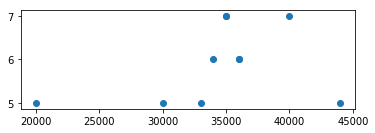

In [26]:
import matplotlib
import matplotlib.pyplot as plt

f1 = plt.figure(1)
plt.subplot(211)
plt.scatter(np_a,np_b)


# 从图上看 主要是最后一个人 家庭收入少 但是房价很高 看一下这个人详细数据 45000的社区房价就一个 知足弄社区

In [31]:
# df_3[df['villname'=='知足弄社区']]
id_1 = df_3[df_3['villname']=='知足弄社区']['new']
id_1

3    15be5fcc0e2225772c77faff659ea709
Name: new, dtype: object

# 假设这个人汇报的家庭收入有错 或者其家庭收入虽然低 但是父母家给与了大量购房资助 或者买这个房子是很早的

# 还有一种可能 是住在父母家 父母收入也低？不知道 相关性对异常值很敏感啊
# 去掉这个人之后的相关性是多少

In [32]:
np_a = np.array(price2_list) 
np_b = np.array(df_3['familyincm']) 
np_a

np.corrcoef(np_a[1:],np_b[1:])#0.34803218

array([[1.        , 0.69223184],
       [0.69223184, 1.        ]])

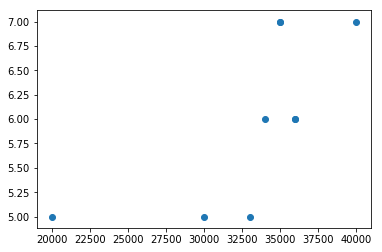

In [33]:
plt.scatter(np_a[1:],np_b[1:])

# 显然相关性已经很高了 还有一个是 3万多 收入5的 

# 0415切换ubuntu环境测试

In [2]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.frame import DataFrame
fr= open("/data/shichang/workdata/new_full_data/杭州_城区_lbs_price_1.txt",encoding='UTF-8')
df = pd.read_csv(fr,sep=',',dtype={"sex": str, "birthyear": str,"marriage":str})
pd.set_option('max_columns',1000) 
pd.set_option('max_row',300) 
df.head()
# 进一步 只考虑教育程度为本科的
df_3 = df[(df['familyincm']>0)&(df['houseowner']=='自家（包括父母家）自有住房')&(df['sex']=='1')&(df['education']=='本科')]
df_3['villname'].unique()

TypeError: 'encoding' is an invalid keyword argument for this function

In [4]:
!pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/32/6b/0368cfa5e1d1ae169ab7dc78addda3fd5e6262e48d7373a9114bac7caff7/matplotlib-2.2.4-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c4/33/8ec8dcdb4ede5d453047bbdbd01916dbaccdb63e98bba60989718f5f0876/numpy-1.16.2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/03/8e/2424c0e65c4a066e28f539364deee49b6451f8fcd4f718fefa50cc3dcf48/backports.functools_lru_cache-1.5-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3a/62/a8c9bef3059d55ab38e41fe9cba4fad773bfc04e47290bab84db1c18262e/kiwisolver-1.0.1-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/3d/73/fe30c2daaaa0713420d0382b16fbb761409f532c56bdcc514bf7b6262bb6/pytz-2019.1-py2.py3-none-any.

In [2]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.frame import DataFrame
fr= open("/data/shichang/workdata/new_full_data/杭州_城区_lbs_price_1.txt",encoding='UTF-8')
df = pd.read_csv(fr,sep=',',dtype={"sex": str, "birthyear": str,"marriage":str})
pd.set_option('max_columns',1000) 
pd.set_option('max_row',300) 
df.head()
# 进一步 只考虑教育程度为本科的
df_3 = df[(df['familyincm']>0)&(df['houseowner']=='自家（包括父母家）自有住房')&(df['sex']=='1')&(df['education']=='本科')]
df_3['villname'].unique()

array(['知足弄社区', '西陵社区', '江一社区', '共联社区', '协同社区', '杨家社区', '江三社区', '东河社区'],
      dtype=object)

In [9]:
pip show --verbose pandas

SyntaxError: invalid syntax (<ipython-input-9-9b01abd93b89>, line 1)

In [5]:
import sys
sys.path.append('/home/netai/.conda/envs/DL35/lib/python3.7/site-packages')
import pandas

ImportError: C extension: No module named conversion not built. If you want to import pandas from the source directory, you may need to run 'python setup.py build_ext --inplace --force' to build the C extensions first.

In [ ]:
import pandas

In [3]:
import pip

def install(package):
   pip.main(['install', package])

install('pandas') 

  Using cached https://files.pythonhosted.org/packages/c4/33/8ec8dcdb4ede5d453047bbdbd01916dbaccdb63e98bba60989718f5f0876/numpy-1.16.2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/3d/73/fe30c2daaaa0713420d0382b16fbb761409f532c56bdcc514bf7b6262bb6/pytz-2019.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/73/fb/00a976f728d0d1fecfe898238ce23f502a721c0ac0ecfedb80e0d88c64e9/six-1.12.0-py2.py3-none-any.whl


In [ ]:
import sys

print sys.executable

In [1]:
print '1'

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-1-04826385f337>, line 1)